# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [652]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_merge = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
study_merge = pd.DataFrame(study_merge)


# Display the data table for preview
study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [654]:
# Checking the number of mice.
total_mice = study_merge['Mouse ID'].nunique()
total_mice

249

In [656]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = study_merge[study_merge.duplicated(['Mouse ID','Timepoint'])]
duplicate = pd.DataFrame({'Mouse ID':duplicate['Mouse ID'].unique()})
duplicate.head()

,Mouse ID
0,g989


In [657]:
# Optional: Get all the data for the duplicate mouse ID.
study_merge.loc[study_merge["Mouse ID"]==str(duplicate.iloc[0,0]),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [660]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouseID_drop = study_merge[study_merge["Mouse ID"]==str(duplicate.iloc[0,0])].index
study_merge_withoutdup = study_merge.drop(duplicate_mouseID_drop)
study_merge_withoutdup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [662]:
# Checking the number of mice in the clean DataFrame = 248
total_mice_now = study_merge_withoutdup['Mouse ID'].nunique()
total_mice_now

248

## Summary Statistics

In [665]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = study_merge_withoutdup.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
tumor_median = study_merge_withoutdup.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
tumor_var = study_merge_withoutdup.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
tumor_std = study_merge_withoutdup.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
tumor_sem = study_merge_withoutdup.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()
regimen_summary = pd.merge(tumor_mean,tumor_median,on="Drug Regimen")
regimen_summary = pd.merge(regimen_summary,tumor_var,on="Drug Regimen")
regimen_summary.rename(columns={
    "Tumor Volume (mm3)_x":"Mean Tumor Volume",
    "Tumor Volume (mm3)_y":"Median Tumor Volume",
    "Tumor Volume (mm3)":"Tumor Volumn Variance"
},inplace=True)
regimen_summary = pd.merge(regimen_summary,tumor_std,on="Drug Regimen")
regimen_summary = pd.merge(regimen_summary,tumor_sem,on="Drug Regimen")
regimen_summary.rename(columns={
    "Tumor Volume (mm3)_x":"Tumor Volume Std. Dev.",
    "Tumor Volume (mm3)_y":"Tumor Volume Std. Err.",
},inplace=True)
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volumn Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [667]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_via_agg = study_merge_withoutdup.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_summary_via_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [669]:
total_mice = study_merge_withoutdup.groupby("Drug Regimen")[["Mouse ID"]].nunique()
total_mice = total_mice.iloc[:,0]
total_mice

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [671]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
### grouping data set "drug regimen" and counting the number of unique "mouse ids"
total_mice = study_merge_withoutdup.groupby("Drug Regimen")[["Mouse ID"]].nunique()
### pull data from each row, first column
total_mice = total_mice.iloc[:,0]
x_axis = np.arange(len(total_mice))
total_mice

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

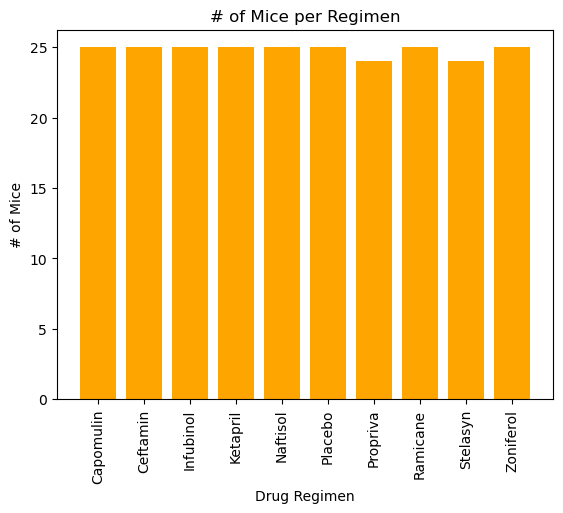

In [674]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
### grouping data set "drug regimen" and counting the number of unique "mouse ids"
total_mice = study_merge_withoutdup.groupby("Drug Regimen")[["Mouse ID"]].nunique()
### pull data from each row, first column = drug regimen
total_mice = total_mice.iloc[:,0]
### count unique mouse IDs in first column = drug regimen
x_axis = np.arange(len(total_mice))
### drug regimens as x axis labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_mice.index,rotation="vertical")
### plot bar graph with x axis with total mice, 
plt.bar(x_axis, total_mice, color='orange', align="center")
plt.title("# of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.show()

In [676]:
study_merge_withoutdup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


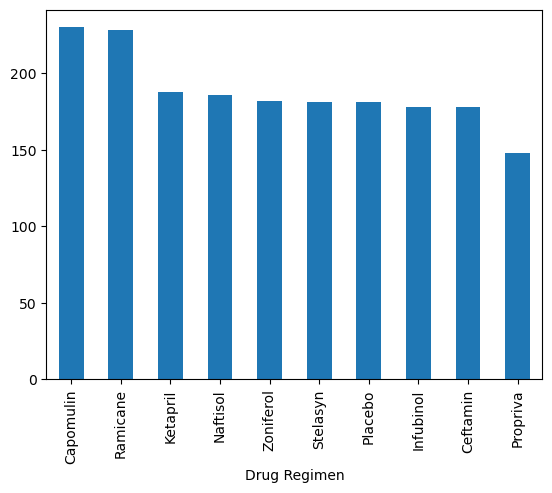

In [723]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
study_merge_withoutdup['Drug Regimen'].value_counts().plot.bar()
plt.show()

In [725]:
gender_count = study_merge_withoutdup.groupby("Sex")[["Mouse ID"]].nunique()
gender_count


,Mouse ID
Sex,
Female,123
Male,125


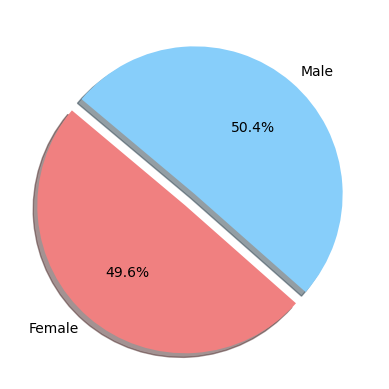

In [727]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_count = study_merge_withoutdup.groupby("Sex")[["Mouse ID"]].nunique()

gender = ["Female", "Male"]
gender_totals = gender_count["Mouse ID"] 
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)

plt.pie(gender_totals, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

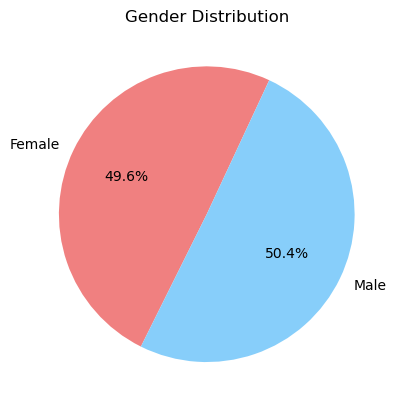

In [729]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.pie(gender_totals, labels = gender, autopct='%1.1f%%', startangle = 65, colors = colors)
plt.title("Gender Distribution")
plt.show


## Quartiles, Outliers and Boxplots

In [733]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_vol_df = study_merge_withoutdup.copy()
max_vol_df = max_vol_df.groupby('Mouse ID').max()['Timepoint']
max_vol_df_all = pd.DataFrame(max_vol_df)
max_vol_merge = pd.merge(max_vol_df_all, study_merge_withoutdup, on=("Mouse ID","Timepoint"),how="left")



In [842]:
Capomulin = max_vol_merge.loc[max_vol_merge['Drug Regimen'] == "Capomulin",:]
Ramicane = max_vol_merge.loc[max_vol_merge['Drug Regimen'] == "Ramicane", :]
Infubinol = max_vol_merge.loc[max_vol_merge['Drug Regimen'] == "Infubinol", :]
Ceftamin = max_vol_merge.loc[max_vol_merge['Drug Regimen'] == "Ceftamin", :]

Cap_Rami = pd.merge(Capomulin, Ramicane, how='outer')
Cap_Rami_Inf = pd.merge(Cap_Rami, Infubinol, how='outer')
Cap_Rami_Inf_Cef = pd.merge(Cap_Rami_Inf, Ceftamin, how='outer')
Cap_Rami_Inf_Cef

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [789]:
final_tumor_vol = Cap_Rami_Inf_Cef[["Mouse ID", "Tumor Volume (mm3)"]]
final_tumor_vol

,Mouse ID,Tumor Volume (mm3)
0,a203,67.973419
1,a251,65.525743
2,a275,62.999356
3,a411,38.407618
4,a444,43.047543
...,...,...
95,y769,68.594745
96,y793,31.896238
97,y865,64.729837
98,z578,30.638696


In [791]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tum_vol = pd.merge(study_merge_withoutdup, final_tumor_vol, on=("Mouse ID"),how="left")
final_tum_vol.rename(columns={
    "Tumor Volume (mm3)_x":"Tumor Volume (mm3)",
    "Tumor Volume (mm3)_y":"Final Tumor Volume (mm3)",
},inplace=True)
final_tum_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3)
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,f932,0,45.000000,0,Ketapril,Male,15,29,NaN
2,g107,0,45.000000,0,Ketapril,Female,2,29,NaN
3,a457,0,45.000000,0,Ketapril,Female,11,30,NaN
4,c819,0,45.000000,0,Ketapril,Male,21,25,NaN
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,41.581521
1876,u364,45,31.023923,3,Capomulin,Male,18,17,31.023923
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,61.433892
1878,x773,45,58.634971,4,Placebo,Female,21,30,NaN


In [793]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_loop = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen_loop:

# Locate the rows which contain mice on each drug and get the tumor volumes
    max_drug = final_tum_vol.loc[final_tum_vol["Drug Regimen"]==drug,:]
    quartiles = final_tum_vol["Final Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of Final Tumor Volume (mm3) for {drug} is: {lowerq}")
    print(f"The upper quartile of Final Tumor Volume (mm3) for {drug} is: {upperq}")
    print(f"The interquartile range of Final Tumor Volume (mm3) for {drug} is: {iqr}")
    print(f"The the median of Final Tumor Volume (mm3) for {drug} is: {quartiles[0.5]} ")
    print(f"\nValues below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume (mm3) for Capomulin is: 36.13485243
The upper quartile of Final Tumor Volume (mm3) for Capomulin is: 61.43389223
The interquartile range of Final Tumor Volume (mm3) for Capomulin is: 25.299039799999996
The the median of Final Tumor Volume (mm3) for Capomulin is: 41.58152074 

Values below -1.8137072699999877 could be outliers.
Values above 99.38245192999999 could be outliers.
The lower quartile of Final Tumor Volume (mm3) for Ramicane is: 36.13485243
The upper quartile of Final Tumor Volume (mm3) for Ramicane is: 61.43389223
The interquartile range of Final Tumor Volume (mm3) for Ramicane is: 25.299039799999996
The the median of Final Tumor Volume (mm3) for Ramicane is: 41.58152074 

Values below -1.8137072699999877 could be outliers.
Values above 99.38245192999999 could be outliers.
The lower quartile of Final Tumor Volume (mm3) for Infubinol is: 36.13485243
The upper quartile of Final Tumor Volume (mm3) for Infubinol is: 61.43389223
The interq

In [795]:
# Determine outliers using upper and lower bounds
outliers = final_tum_vol.loc[(final_tum_vol['Final Tumor Volume (mm3)'] < lower_bound) | (final_tum_vol['Final Tumor Volume (mm3)'] > upper_bound)]

if len(outliers) == 0:
    print(f"\n{drug} has no potential outliers\n")
    print("-------------------------------------")
else:
    print(f"\nPotential outliers for {drug}")
    print(outlier_vol.to_string(index=False))
    print("-------------------------------------")


Ceftamin has no potential outliers

-------------------------------------


In [797]:
# add subset 


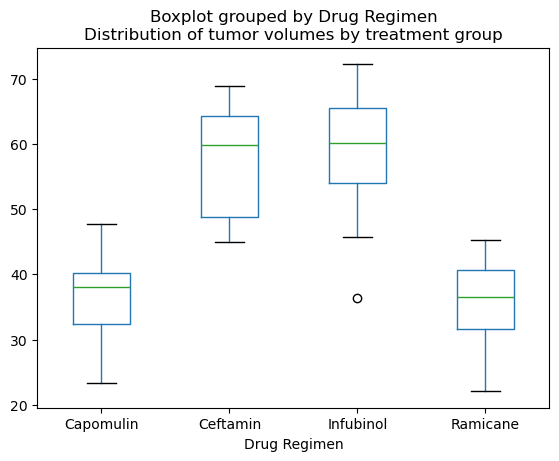

In [827]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import pandas as pd 
import matplotlib.pyplot as plt 


Cap_Rami_Inf_Cef.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False)
plt.title('Distribution of tumor volumes by treatment group')
plt.show()

## Line and Scatter Plots

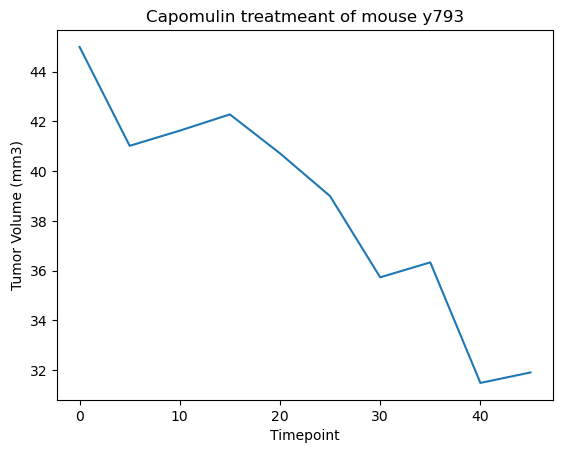

In [891]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
y793_df = study_merge_withoutdup.loc[study_merge_withoutdup["Mouse ID"] == "y793",:]
y793_df.head()

x_axis_Cap = y793_df["Timepoint"]
y_axis_tumorvol = y793_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse y793')
plt.plot(x_axis_Cap, y_axis_tumorvol)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()


ValueError: x and y must be the same size

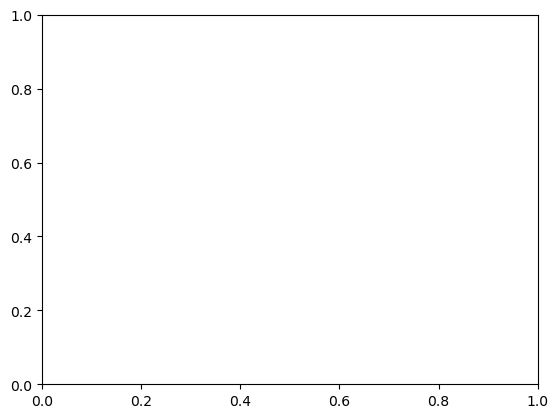

In [899]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
y793_df = study_merge_withoutdup.loc[study_merge_withoutdup["Mouse ID"] == "y793",:]
tumor_avg = y793_df[['Tumor Volume (mm3)']].mean()
plt.scatter(y793_df['Weight (g)'],tumor_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
y793_df = study_merge_withoutdup.loc[study_merge_withoutdup["Mouse ID"] == "y793",:]
tumor_avg = y793_df[['Tumor Volume (mm3)']].mean()
plt.scatter(study_merge_withoutdup['Weight (g)'],tumor_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


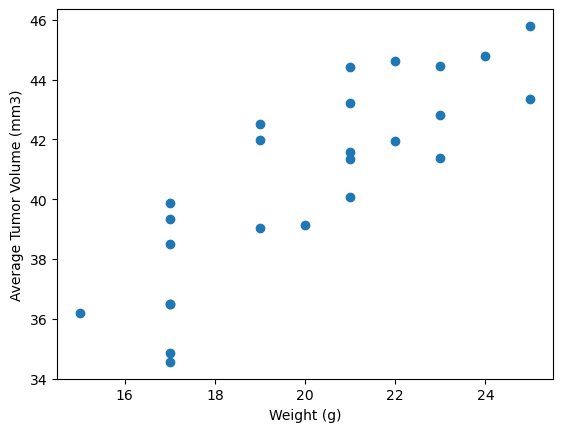

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


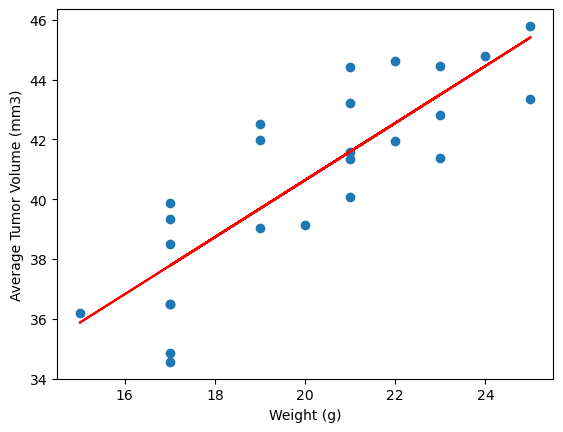

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
